## Approach one

In [1]:
import pandas as pd
import numpy as np

In [80]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

In [2]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

In [3]:
class Infection_cals:

    @staticmethod
    def dist_calc(dfx, dfy, contact_s):
        df_x = pd.read_csv(dfx, names=[el for el in range(1000)])
        df_y = pd.read_csv(dfy, names=[el for el in range(1000)])
        other_users = df_x.columns[1:]
        infected_users = []
        for user in other_users:
            for i in range(len(df_x[0])-1):
                    dist = np.sqrt(np.power(df_x[0][i]-df_x[user][i],2) + np.power(df_y[0][i]-df_y[user][i],2))
                    if dist < contact_s:
                        if user not in infected_users:
                            infected_users.append(user)
                        break
                        
        return infected_users, len(infected_users)
    

    
    @staticmethod
    def other_infections(dfx, dfy, contact_s):
        df_x = pd.read_csv(dfx, names=[el for el in range(1000)])
        df_y = pd.read_csv(dfy, names=[el for el in range(1000)])
        
        # Other users rather than the user number 0
        other_users = df_x.columns[1:]
        
        # Number of usees and the code of the users become infected with user 0
        inf_users, num = Infection_cals.dist_calc(dfx, dfy, contact_s)
        
        final_dict = {}
        number_of_infections = []
        second_chain = []
        number_of_infections.append(num)
        
        # Adding the user zero infected user list and the number of infected persons in final dict
        final_dict[0] = [inf_users, num]
        
        # srarch between the contacts of the infected users and find who else was in immediate
        # contact with that user and become infected
        for infuser in inf_users:
            # Other users reather than patient number 0
            other_users = list(df_x.columns[1:])
#             print("other_users: list(df_x.columns[2:])", other_users)
            # 
            if infuser in other_users:
                other_users.remove(infuser)
            infected_users = []
            for user in other_users:
                # check if the user we are checking is not already recognized to be infected
                if (user not in infected_users) and (user not in inf_users):
                    for i in range(len(df_x[user])-1):
                        dist = np.sqrt(np.power(df_x[infuser][i]-df_x[user][i],2) + np.power(df_y[infuser][i]-df_y[user][i],2))
                        if dist < contact_s:
                            infected_users.append(user)
                            break
            
                final_dict[infuser] = [infected_users, len(infected_users)]
            second_chain.append(len(infected_users))
        
        number_of_infections.append(second_chain)
        
        qq = []
        for el in [el[0] for el in list(final_dict.values())]:
            qq.extend(el)
        
        return final_dict, number_of_infections, len(set(qq))/1000*100
    
    
    @staticmethod
    def all_infections(dfx, dfy, contact_s):
        df_x = pd.read_csv(dfx, names=[el for el in range(1000)])
        df_y = pd.read_csv(dfy, names=[el for el in range(1000)])
        other_users = df_x.columns[1:]
        
        inf_users, num = Infection_cals.dist_calc(dfx, dfy, contact_s)
        final_dict = {}
        number_of_infections = []
        second_chain = []
        number_of_infections.append(num)
        final_dict[0] = [inf_users, num]
        for infuser in inf_users:
            other_users = list(df_x.columns[1:])
            if infuser in other_users:
                other_users.remove(infuser)
            infected_users = []
            for user in other_users:
                for i in range(len(df_x[user])-1):
                    if user not in infected_users:
                        dist = np.sqrt(np.power(df_x[infuser][i]-df_x[user][i],2) + np.power(df_y[infuser][i]-df_y[user][i],2))
                        if dist < contact_s:
                            infected_users.append(user)
                            break
            
                final_dict[infuser] = [infected_users, len(infected_users)]
            second_chain.append(len(infected_users))
        
        number_of_infections.append(second_chain)
        
        qq = []
        for el in [el[0] for el in list(final_dict.values())]:
            qq.extend(el)
        
        
        return final_dict, number_of_infections, len(set(qq))/1000*100
    

            
        

In [99]:
df_x = pd.read_csv('X_Estimated_CNN.csv', names=[el for el in range(1000)])

In [100]:
df_x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,15.837,15.642,9.6839,9.8484,19.184,4.8264,12.071,8.6943,6.9703,15.350,...,7.4099,7.2730,12.115,11.0750,17.850,3.8000,9.8188,14.189,13.160,0.82191
1,17.863,16.642,10.5390,9.8318,18.101,5.2890,13.067,8.2907,7.4751,15.369,...,7.3259,7.6444,11.867,10.6400,18.554,4.6469,9.7878,13.661,13.141,1.37430
2,18.815,16.260,11.1460,9.4346,18.396,4.8208,12.375,8.3314,6.9550,15.371,...,7.0874,8.2285,12.746,9.8424,17.347,3.7799,10.5390,13.292,12.237,1.87460
3,17.247,15.448,10.8320,9.2643,18.475,5.2387,11.956,8.1726,6.2455,13.406,...,7.6092,8.8252,12.312,10.2720,18.026,4.2319,9.9413,13.521,12.103,1.35210
4,17.372,15.912,10.4190,8.8822,19.786,4.8347,12.643,8.2757,5.6805,14.133,...,7.2352,8.8938,12.284,10.7810,18.099,4.8141,9.5493,14.097,11.945,0.83862


In [102]:
other_users = list(df_x.columns)[:100]

99

In [114]:
class Credit_cals:
    @staticmethod
    def credir_calc_one(dfx, dfy, contact_s, user_id, lambdaPlus, lambdaMinus, num_of_users=1000):
        df_x = pd.read_csv(dfx, names=[el for el in range(1000)])
        df_y = pd.read_csv(dfy, names=[el for el in range(1000)])
        other_users = list(df_x.columns)[:num_of_users]
        other_users.remove(user_id)
        All_Credits = []
        credit = 0
        for i in range(len(df_x[0])-1):
            for user in other_users:
                    dist = np.sqrt(np.power(df_x[user_id][i]-df_x[user][i],2) + 
                                   np.power(df_y[user_id][i]-df_y[user][i],2))
                    if dist < contact_s:
                        if (dist != 0) and (dist >= 0.01):
#                             print("Added: ", -1 * lambdaMinus / dist)
                            credit += -1 * lambdaMinus / dist
                            All_Credits.append(credit)
#                             print("current credit: ", credit)
                        else:
#                             print("Added: ", -1 * lambdaMinus * 100)
                            credit += -1 * lambdaMinus * 100
                            All_Credits.append(credit)
#                             print("current credit: ", credit)
                    else:
                        if dist <= 10:
#                             print("Added: ", dist / lambdaPlus)
                            credit += dist / lambdaPlus
                            All_Credits.append(credit)
#                             print("current credit: ", credit)

                        
        return credit, All_Credits
    
    
    @staticmethod
    def All_credit_calc(dfx, dfy, contact_s, lambdaPlus, lambdaMinus, num_of_users=1000):
        df_x = pd.read_csv(dfx, names=[el for el in range(1000)])
        df_y = pd.read_csv(dfy, names=[el for el in range(1000)])
        all_users = list(df_x.columns)[:num_of_users]
        final_credits = list()
        credits_dict = dict()
        for user in all_users:
            credit_user, All_Credits_of_user = Credit_cals.credir_calc_one(dfx, dfy, contact_s, user, lambdaPlus, 
                                                                           lambdaMinus, 1000)
            final_credits.append(credit_user)
            credits_dict[user] = All_Credits_of_user
            
        return final_credits, credits_dict

In [105]:
# cred, all_cred = Credit_cals.credir_calc_one("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2, 10, 10,5)
# cred2, all_cred2 = Credit_cals.credir_calc_one("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2, 10, 10,10)
# cred3, all_cred3 = Credit_cals.credir_calc_one("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2, 10, 1,5)
# cred4, all_cred4 = Credit_cals.credir_calc_one("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2, 10, 5,10)

In [106]:
# cred_all_CNN_35_100, all_cred_alls_CNN_35_100 = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,3,5,num_of_users=100)

In [108]:
# cred_all_CNN_310_100, all_cred_alls_CNN_310_100 = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,3,10,num_of_users=100)

In [110]:
# cred_all_CNN_212_100, all_cred_alls_CNN_212_100 = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,2,12,num_of_users=100)

In [112]:
# cred_all_CNN_220_100, all_cred_alls_CNN_220_100 = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,2,20,num_of_users=100)

In [117]:
# cred_all_EKFT_220_100, all_cred_alls_EKFT_220_100 = Credit_cals.All_credit_calc("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 2,2,20,num_of_users=100)

In [ ]:
cred_all_UKFT_220_1000, all_cred_alls_UKFT_220_1000 = Credit_cals.All_credit_calc("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 2,2,20,num_of_users=1000)

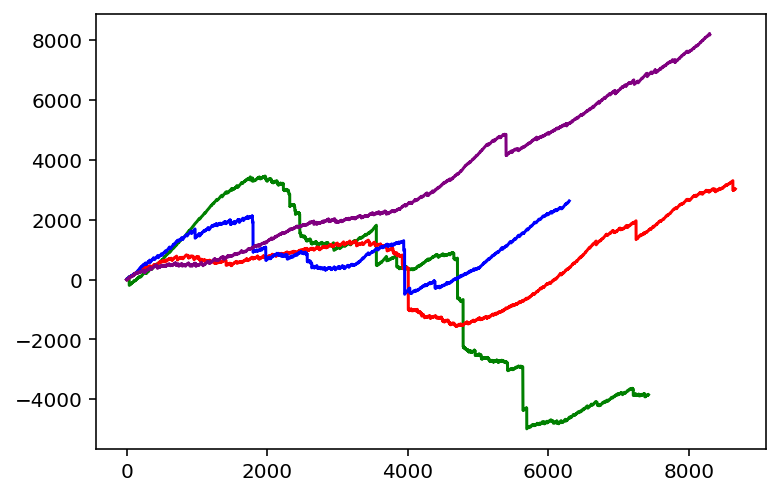

In [113]:
plt.plot([el for el in range(len(all_cred_alls_CNN_220_100[10]))], all_cred_alls_CNN_220_100[10], color='green')
plt.plot([el for el in range(len(all_cred_alls_CNN_220_100[11]))], all_cred_alls_CNN_220_100[11], color='red')
plt.plot([el for el in range(len(all_cred_alls_CNN_220_100[50]))], all_cred_alls_CNN_220_100[50], color='blue')
plt.plot([el for el in range(len(all_cred_alls_CNN_220_100[60]))], all_cred_alls_CNN_220_100[60], color='purple')

In [ ]:
# cred_all_EKFT, all_cred_alls_EKFT = Credit_cals.All_credit_calc("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 2,4,5)
# cred_all_UKFT, all_cred_alls_UKFT = Credit_cals.All_credit_calc("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 2,4,5)
# cred_all_EKFA, all_cred_alls_EKFA = Credit_cals.All_credit_calc("X_Estimated_EKFA.csv", "Y_Estimated_EKFA.csv", 2,4,5)
# cred_all_UKFA, all_cred_alls_UKFA = Credit_cals.All_credit_calc("X_Estimated_UKFA.csv", "Y_Estimated_UKFA.csv", 2,4,5)
# cred_all_UKFTA, all_cred_alls_UKFTA = Credit_cals.All_credit_calc("X_Estimated_UKFTA.csv", "Y_Estimated_UKFTA.csv", 2,4,5)
# cred_all_CNN, all_cred_alls_CNN = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,4,5)


In [115]:
cred_all_CNN_220_1000, all_cred_alls_CNN_220_1000 = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,2,20,num_of_users=1000)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\salimibeni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-115-4b7a6e9c8513>", line 1, in <module>
    cred_all_CNN_220_100, all_cred_alls_CNN_220_100 = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,2,20,num_of_users=1000)
  File "<ipython-input-114-5ffd8aa67b90>", line 44, in All_credit_calc
    credit_user, All_Credits_of_user = Credit_cals.credir_calc_one(dfx, dfy, contact_s, user, lambdaPlus,
  File "<ipython-input-114-5ffd8aa67b90>", line 13, in credir_calc_one
    np.power(df_y[user_id][i]-df_y[user][i],2))
  File "C:\Users\salimibeni\anaconda3\lib\site-packages\pandas\core\frame.py", line 2878, in __getitem__
    return self._get_item_cache(key)
  File "C:\Users\salimibeni\anaconda3\lib\site-packages\pandas\core\generic.py", line 3542, in _get_item_cache
    res = self._box_col_values(

TypeError: object of type 'NoneType' has no len()

In [13]:
# cred5, all_cred5 = Credit_cals.credir_calc_one("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2, 10, 5,5)


In [7]:
len(all_cred), cred

(75874, -88148.4188455147)

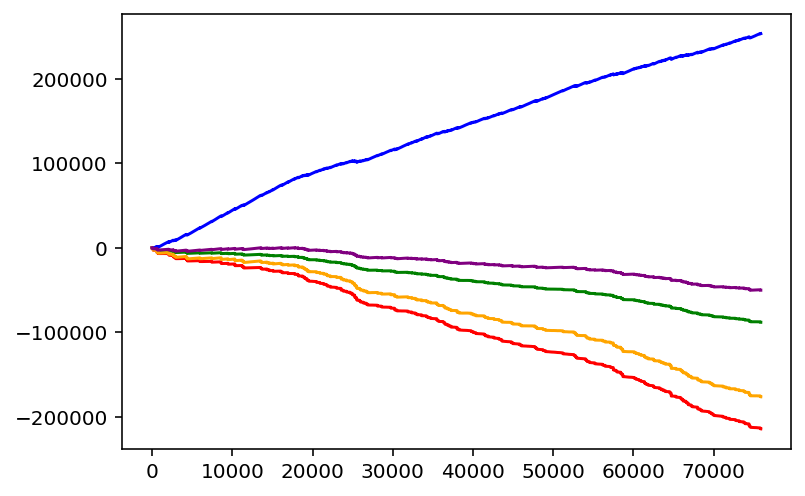

In [14]:
import matplotlib.pyplot as plt

# plt.plot([el for el in range(len(all_cred))], all_cred, color='green', marker='o', linestyle='dashed',linewidth=1, markersize=2)

plt.plot([el for el in range(len(all_cred))], all_cred, color='green')
plt.plot([el for el in range(len(all_cred2))], all_cred2, color='red')
plt.plot([el for el in range(len(all_cred3))], all_cred3, color='blue')
plt.plot([el for el in range(len(all_cred4))], all_cred4, color='orange')
plt.plot([el for el in range(len(all_cred5))], all_cred5, color='purple')

In [15]:
# cred_all, all_cred_alls = Credit_cals.All_credit_calc("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2,5,5)


In [16]:
cred_all

[-30406.917183516696,
 -12914.382199704716,
 -9059.192257533932,
 -23430.652734896572,
 -29087.856490147984,
 -12271.57754712567,
 -44520.86614143905,
 -36794.9789354815,
 -59995.65427161223,
 -26301.630256776287,
 -50211.23099945549,
 -36524.623760678725,
 -69921.09472982697,
 -46728.43428842277,
 -28876.328049409163,
 -13175.809065717327,
 -34479.33846248207,
 -40441.87107997884,
 -7366.5405638900675,
 -21068.71014412821,
 -94356.91332391134,
 -17556.992730995884,
 -70424.45599302082,
 -26249.77079449886,
 -3941.5637833311885,
 -92350.3168523629,
 -36009.15239188128,
 -35208.82858083007,
 -72689.87868429365,
 -25801.695775681357,
 -67796.59747338972,
 -13593.084618231358,
 -21120.51314411294,
 -23362.63041866302,
 -21716.751596673774,
 -77394.57498224011,
 -20238.25328596493,
 -45615.96741092415,
 -31015.048830556203,
 9116.307613354602,
 -41866.44811385873,
 -81394.31695265634,
 -25350.097383470093,
 -53947.89211396238,
 -63039.88398054372,
 -85547.41602157013,
 -30643.30125734918,


In [17]:
all_cred_alls[100]

[-5.0,
 -4.434314575050762,
 -2.5475183486394415,
 -1.5475183486394415,
 -0.20587756213956765,
 1.763893998219653,
 2.363893998219653,
 4.1638939982196534,
 4.563893998219654,
 5.844518845706224,
 7.3005408235623275,
 8.517093329621972,
 9.536897232340529,
 10.36151835746406,
 11.703159143963934,
 12.503159143963934,
 13.719711650023578,
 15.519711650023579,
 11.984177744090841,
 13.596629293750551,
 14.813181799810195,
 15.445637331843871,
 16.859850894216965,
 18.259850894216964,
 19.27965479693552,
 21.27965479693552,
 23.000119850344046,
 24.844028741802624,
 25.56513899689542,
 27.17759054655513,
 28.898055599963655,
 30.61852065337218,
 32.03273421574527,
 27.032734215745272,
 28.05253811846383,
 30.02230967882305,
 30.654765210856723,
 27.119231304923986,
 29.119231304923986,
 30.963140196382565,
 32.763140196382565,
 33.61166833380642,
 35.50903492990745,
 37.39583115631877,
 38.41563505903733,
 39.136745314130124,
 40.53674531413012,
 41.950958876503215,
 42.550958876503216,
 

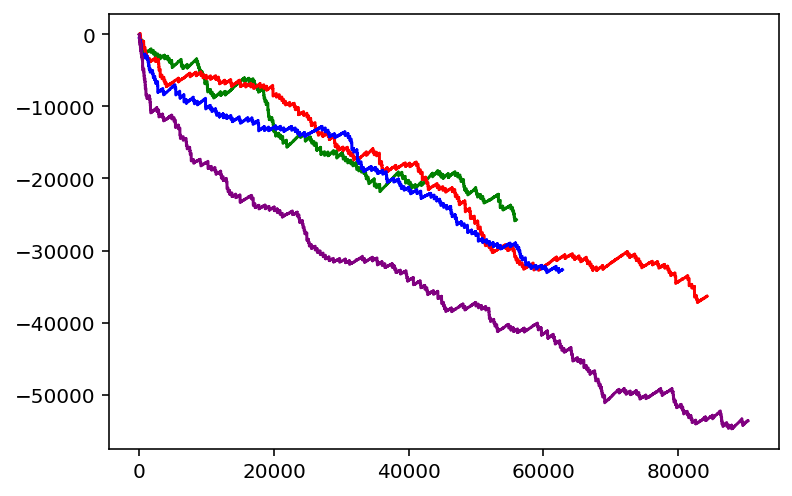

In [20]:
plt.plot([el for el in range(len(all_cred_alls[100]))], all_cred_alls[100], color='green')
plt.plot([el for el in range(len(all_cred_alls[110]))], all_cred_alls[110], color='red')
plt.plot([el for el in range(len(all_cred_alls[500]))], all_cred_alls[500], color='blue')
plt.plot([el for el in range(len(all_cred_alls[610]))], all_cred_alls[610], color='purple')


In [21]:
# cred_all, all_cred_alls = Credit_cals.All_credit_calc("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2,3,5)


In [70]:
all_cred_alls

[12747.212561671087,
 47959.67647249829,
 54352.9456616509,
 40960.74324798954,
 15909.566541817989,
 53552.537430962315,
 16773.06854395607,
 27425.63113857342,
 -8874.29354896491,
 34979.85360075474,
 371.6861286107645,
 22864.640941756465,
 -17163.3995887728,
 114.91371056322285,
 32610.815174459825,
 28821.58135288275,
 24866.282612238894,
 10529.462639208168,
 33011.58190306374,
 31806.736074622564,
 -45070.59509081787,
 25893.88489877322,
 -24829.300238048883,
 29126.639724903383,
 38243.48546940922,
 -38941.862624133144,
 3158.0865044740244,
 30142.193774590203,
 -26684.94718260228,
 38720.258939346546,
 -20184.112150507324,
 51751.03711916825,
 22013.162245610212,
 42991.32218200945,
 39670.04118081609,
 -28564.928383170725,
 21760.68496425809,
 12905.880679196342,
 23930.736672558378,
 64651.51897502348,
 20514.379734498216,
 -27088.80532777508,
 25576.651151635764,
 4740.650773174809,
 -15352.771381194285,
 -41632.38288827891,
 31489.183941114097,
 -28991.233368677826,
 31873

In [87]:
# cred_all_GT_45, all_cred_alls_GT_45 = Credit_cals.All_credit_calc("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2,4,5)


NameError: name 'cred_all_GT_45' is not defined

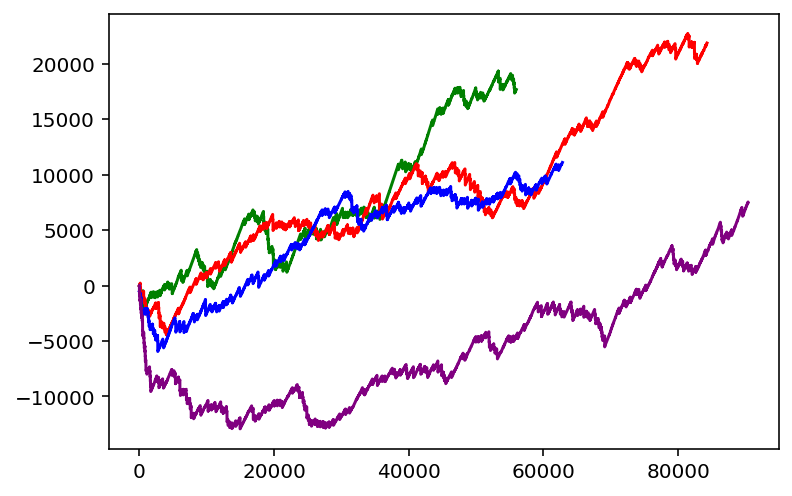

In [28]:
plt.plot([el for el in range(len(all_cred_alls[100]))], all_cred_alls[100], color='green')
plt.plot([el for el in range(len(all_cred_alls[110]))], all_cred_alls[110], color='red')
plt.plot([el for el in range(len(all_cred_alls[500]))], all_cred_alls[500], color='blue')
plt.plot([el for el in range(len(all_cred_alls[610]))], all_cred_alls[610], color='purple')

In [25]:
# max(len(list(all_cred_alls.values))
all_cred_alls.values

<function dict.values>

In [51]:
# final_dict = {}
# prev_dict = all_cred_alls
# max_length = np.max([len(all_cred_alls[i]) for i in range(1000)])
# for i in range(1000):
#     for j in range(max_length - len(all_cred_alls[i])):
#         prev_dict[i].append(0)
        
# df_3_5 = pd.DataFrame.from_dict(prev_dict) 

In [52]:
# df_3_5.to_csv('df_3_5.csv')

In [53]:
# df35 = pd.read_csv('df_3_5.csv')

In [ ]:
df_CNN = pd.read_csv('df_3_5.csv')

In [54]:
df35.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,0.745356,0.745356,2.867442,3.299832,1.699673,1.666667,1.943651,2.981424,3.000000,...,3.333333,3.333333,1.666667,2.236068,2.027588,2.108185,2.687419,1.943651,2.403701,3.018462
1,1,3.612798,2.981424,5.103510,5.903248,2.901524,3.461722,3.318019,5.408127,4.414214,...,6.406515,6.406515,3.157379,3.935741,3.518299,4.511886,4.795604,3.145501,4.070368,6.180739
2,2,6.912629,5.584841,5.770176,6.569915,5.568190,5.888425,4.260828,1.872593,6.357864,...,8.350165,8.350165,4.952434,4.681097,6.205719,5.257242,-0.204396,4.478834,5.124460,7.555108
3,3,8.612303,6.786691,8.436843,9.318652,8.316927,7.262793,5.751540,2.926686,7.559715,...,10.888756,10.888756,7.379137,6.055466,8.893138,7.923909,0.795604,5.969546,6.178553,10.221775
4,4,10.555953,8.161059,10.103510,11.113707,10.425112,8.464644,7.859725,5.945148,9.259388,...,12.683811,12.683811,9.982553,8.482169,3.893138,9.623582,3.483024,7.302880,7.878226,12.329960


In [77]:
df35["0"]

0         0.745356
1         3.612798
2         6.912629
3         8.612303
4        10.555953
           ...    
98110     0.000000
98111     0.000000
98112     0.000000
98113     0.000000
98114     0.000000
Name: 0, Length: 98115, dtype: float64

In [78]:
np.sum(df35["0"])

269065961.88266104

In [14]:
inf_users, num = Infection_cals.dist_calc("X_data_GT.csv", "Y_data_GT.csv", 2)

In [9]:
inf_users, num

([3, 4, 8, 12, 13, 14, 15, 16, 18], 9)

In [ ]:
# Credit Calculator



In [81]:
# cred_all_45, all_cred_alls_45 = Credit_cals.All_credit_calc("X_data_GT_1000.csv", "Y_data_GT_1000.csv", 2,4,5)


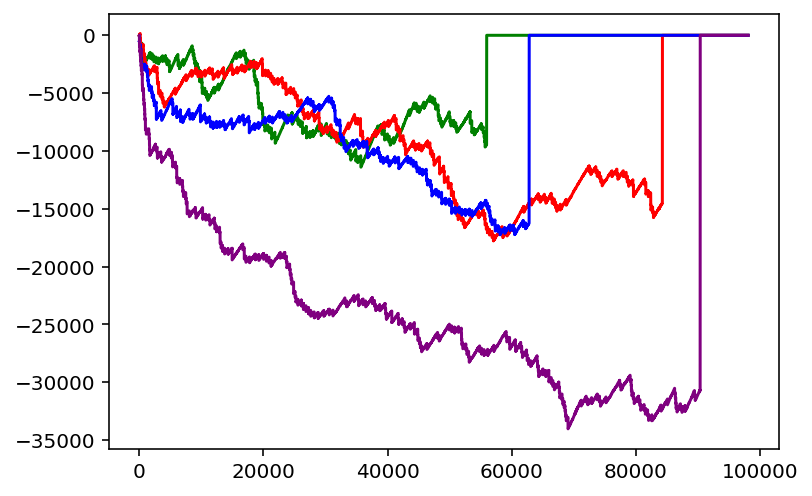

In [82]:
plt.plot([el for el in range(len(all_cred_alls_45[100]))], all_cred_alls_45[100], color='green')
plt.plot([el for el in range(len(all_cred_alls_45[110]))], all_cred_alls_45[110], color='red')
plt.plot([el for el in range(len(all_cred_alls_45[500]))], all_cred_alls_45[500], color='blue')
plt.plot([el for el in range(len(all_cred_alls_45[610]))], all_cred_alls_45[610], color='purple')

In [57]:
final_dict = {}
prev_dict_45 = all_cred_alls_45
max_length_45 = np.max([len(all_cred_alls_45[i]) for i in range(1000)])
for i in range(1000):
    for j in range(max_length_45 - len(all_cred_alls_45[i])):
        prev_dict_45[i].append(0)
        
df_4_5 = pd.DataFrame.from_dict(prev_dict_45) 
df_4_5.to_csv('df_4_5.csv')

In [58]:
# df45 = pd.read_csv('df_4_5.csv')
# df45.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,0.559017,0.559017,2.150581,2.474874,1.274755,1.250000,1.457738,2.236068,2.250000,...,2.500000,2.500000,1.250000,1.677051,1.520691,1.581139,2.015564,1.457738,1.802776,2.263846
1,1,2.709598,2.236068,3.827632,4.427436,2.176143,2.596291,2.488514,4.056095,3.310660,...,4.804886,4.804886,2.368034,2.951806,2.638725,3.383914,3.596703,2.359126,3.052776,4.635555
2,2,5.184472,4.188630,4.327632,4.927436,4.176143,4.416319,3.195621,0.520562,4.768398,...,6.262624,6.262624,3.714325,3.510823,4.654289,3.942931,-1.403297,3.359126,3.843345,5.666331
3,3,6.459227,5.090018,6.327632,6.988989,6.237696,5.447095,4.313655,1.311131,5.669786,...,8.166567,8.166567,5.534353,4.541599,6.669853,5.942931,-0.653297,4.477160,4.633914,7.666331
4,4,7.916965,6.120795,7.577632,8.335280,7.818834,6.348483,5.894794,3.574977,6.944541,...,9.512859,9.512859,7.486915,6.361627,1.669853,7.217686,1.362268,5.477160,5.908669,9.247470


# ALL CREDITS

In [79]:
# cred_all_EKFT, all_cred_alls_EKFT = Credit_cals.All_credit_calc("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 2,4,5)
# cred_all_UKFT, all_cred_alls_UKFT = Credit_cals.All_credit_calc("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 2,4,5)
# cred_all_EKFA, all_cred_alls_EKFA = Credit_cals.All_credit_calc("X_Estimated_EKFA.csv", "Y_Estimated_EKFA.csv", 2,4,5)
# cred_all_UKFA, all_cred_alls_UKFA = Credit_cals.All_credit_calc("X_Estimated_UKFA.csv", "Y_Estimated_UKFA.csv", 2,4,5)
# cred_all_UKFTA, all_cred_alls_UKFTA = Credit_cals.All_credit_calc("X_Estimated_UKFTA.csv", "Y_Estimated_UKFTA.csv", 2,4,5)
# cred_all_CNN, all_cred_alls_CNN = Credit_cals.All_credit_calc("X_Estimated_CNN.csv", "Y_Estimated_CNN.csv", 2,4,5)


In [86]:
plt.plot([el for el in range(len(all_cred_alls_CNN[100]))], all_cred_alls_CNN[100], color='green')
plt.plot([el for el in range(len(all_cred_alls_CNN[110]))], all_cred_alls_CNN[110], color='red')
plt.plot([el for el in range(len(all_cred_alls_CNN[500]))], all_cred_alls_CNN[500], color='blue')
plt.plot([el for el in range(len(all_cred_alls_CNN[610]))], all_cred_alls_CNN[610], color='purple')

NameError: name 'all_cred_alls_CNN' is not defined

In [61]:
len(cred_all_UKFA)

1000

In [63]:
def save_to_dict(dict_name, outputname):
    final_dict = {}
    prev_dict_45 = dict_name
    max_length_45 = np.max([len(dict_name[i]) for i in range(1000)])
    for i in range(1000):
        for j in range(max_length_45 - len(dict_name[i])):
            prev_dict_45[i].append(0)

    df_4_5 = pd.DataFrame.from_dict(prev_dict_45) 
    df_4_5.to_csv(outputname+'.csv')

In [64]:
# save_to_dict(all_cred_alls_EKFT, "all_cred_alls_EKFT_45")

In [65]:
# save_to_dict(all_cred_alls_UKFT, "all_cred_alls_UKFT_45")

In [66]:
# save_to_dict(all_cred_alls_EKFA, "all_cred_alls_EKFA_45")

In [67]:
# save_to_dict(all_cred_alls_UKFA, "all_cred_alls_UKFA_45")

In [68]:
# cred_all_UKFTA, all_cred_alls_UKFTA = Credit_cals.All_credit_calc("X_Estimated_UKFTA.csv", "Y_Estimated_UKFTA.csv", 2,4,5)


In [69]:
# save_to_dict(all_cred_alls_UKFTA, "all_cred_alls_UKFTA_45")

In [ ]:
Final_credits_dict = {"Ground Truth":}

### Ground truph

In [47]:
Infection_cals.other_infections("X_data_GT.csv", "Y_data_GT.csv", 2)

({0: [[3, 4, 8, 12, 13, 14, 15, 16, 18], 9],
  3: [[1, 6, 7, 9], 4],
  4: [[1, 2, 7], 3],
  8: [[19], 1],
  12: [[2, 6, 7], 3],
  13: [[5, 10, 11, 19], 4],
  14: [[1, 6, 7], 3],
  15: [[1, 7], 2],
  16: [[1, 7], 2],
  18: [[6, 7], 2]},
 [9, [4, 3, 1, 3, 4, 3, 2, 2, 2]],
 90.0)

In [51]:
Infection_cals.other_infections("X_data_GT.csv", "Y_data_GT.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19], 15],
  1: [[11], 1],
  2: [[], 0],
  3: [[11], 1],
  4: [[], 0],
  6: [[], 0],
  7: [[], 0],
  8: [[10, 11], 2],
  9: [[5, 10, 11, 17], 4],
  12: [[], 0],
  13: [[5, 10, 11, 17], 4],
  14: [[11], 1],
  15: [[], 0],
  16: [[11], 1],
  18: [[], 0],
  19: [[5, 10, 11, 17], 4]},
 [15, [1, 0, 1, 0, 0, 0, 2, 4, 0, 4, 1, 0, 1, 0, 4]],
 95.0)

In [49]:
Infection_cals.all_infections("X_data_GT.csv", "Y_data_GT.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19], 15],
  1: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18], 13],
  2: [[1, 3, 4, 6, 7, 12, 14, 15, 16, 18], 10],
  3: [[1, 2, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18], 14],
  4: [[1, 2, 3, 6, 7, 8, 12, 13, 14, 15, 16, 18], 12],
  6: [[1, 2, 3, 4, 7, 12, 14, 15, 16, 18], 10],
  7: [[1, 2, 3, 4, 6, 8, 9, 12, 14, 15, 16, 18, 19], 13],
  8: [[1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], 14],
  9: [[1, 3, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 14],
  12: [[1, 2, 3, 4, 6, 7, 8, 14, 15, 16, 18], 11],
  13: [[3, 4, 5, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19], 13],
  14: [[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19], 15],
  15: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 16, 18, 19], 14],
  16: [[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19], 15],
  18: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19], 14],
  19: [[5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18], 12]},
 [15, [13, 10, 14, 12, 10, 13, 14, 14, 11, 13, 15, 

In [50]:
Infection_cals.all_infections("X_data_GT.csv", "Y_data_GT.csv", 2)

({0: [[3, 4, 8, 12, 13, 14, 15, 16, 18], 9],
  3: [[1, 4, 6, 7, 8, 9, 12, 14, 15, 16, 18], 11],
  4: [[1, 2, 3, 7, 8, 14, 16, 18], 8],
  8: [[3, 4, 13, 14, 16, 18, 19], 7],
  12: [[2, 3, 6, 7, 18], 5],
  13: [[5, 8, 10, 11, 19], 5],
  14: [[1, 3, 4, 6, 7, 8, 15, 16, 18], 9],
  15: [[1, 3, 7, 14, 18], 5],
  16: [[1, 3, 4, 7, 8, 14, 18], 7],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16], 9]},
 [9, [11, 8, 7, 5, 5, 9, 5, 7, 9]],
 90.0)

In [22]:
a, b = Infection_cals.all_infections("X_data_GT.csv", "Y_data_GT.csv", 2)

In [43]:
qq = []
for el in [el[0] for el in list(a.values())]:
    qq.extend(el)

In [45]:
len(set(qq))/20*100

90.0

### Estimated_EKFT

In [26]:
Infection_cals.other_infections("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 2)

({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[6, 9], 2],
  4: [[2, 6], 2],
  7: [[6], 1],
  8: [[19], 1],
  12: [[2, 6], 2],
  13: [[5, 9, 10, 11, 19], 5],
  14: [[6, 9, 11, 19], 4],
  15: [[9], 1],
  16: [[6, 9], 2],
  18: [[6, 19], 2]},
 [10, [2, 2, 1, 1, 2, 5, 4, 1, 2, 2]])

In [27]:
Infection_cals.other_infections("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  1: [[11], 1],
  2: [[], 0],
  3: [[10, 11], 2],
  4: [[], 0],
  6: [[11], 1],
  7: [[11], 1],
  8: [[10, 11], 2],
  9: [[5, 10, 11], 3],
  12: [[], 0],
  13: [[5, 10, 11], 3],
  14: [[11], 1],
  15: [[10, 11], 2],
  16: [[11], 1],
  17: [[5, 10, 11], 3],
  18: [[], 0],
  19: [[5, 10, 11], 3]},
 [16, [1, 0, 2, 0, 1, 1, 2, 3, 0, 3, 1, 2, 1, 3, 0, 3]])

In [28]:
Infection_cals.all_infections("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 2)

({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[4, 6, 7, 8, 9, 12, 14, 15, 16, 18], 10],
  4: [[2, 3, 6, 7, 8, 12, 14, 15, 16, 18], 10],
  7: [[3, 4, 6, 8, 12, 14, 15, 16, 18], 9],
  8: [[3, 4, 7, 13, 14, 16, 18, 19], 8],
  12: [[2, 3, 4, 6, 7, 16, 18], 7],
  13: [[5, 8, 9, 10, 11, 19], 6],
  14: [[3, 4, 6, 7, 8, 9, 11, 15, 16, 18, 19], 11],
  15: [[3, 4, 7, 9, 14, 16, 18], 7],
  16: [[3, 4, 6, 7, 8, 9, 12, 14, 15, 18], 10],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16, 19], 10]},
 [10, [10, 10, 9, 8, 7, 6, 11, 7, 10, 10]])

In [29]:
Infection_cals.all_infections("X_Estimated_EKFT.csv", "Y_Estimated_EKFT.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  1: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19], 15],
  2: [[3, 4, 6, 7, 12, 14, 15, 16, 18], 9],
  3: [[2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  4: [[2, 3, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19], 13],
  6: [[2, 3, 4, 7, 9, 11, 12, 14, 15, 16, 18], 11],
  7: [[2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19], 14],
  8: [[3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], 13],
  9: [[3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 15],
  12: [[2, 3, 4, 6, 7, 8, 13, 14, 15, 16, 18], 11],
  13: [[3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19], 15],
  14: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19], 15],
  15: [[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19], 16],
  16: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19], 15],
  17: [[3, 5, 9, 10, 11, 13, 14, 15, 16, 19], 10],
  18: [[2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19], 13],
  19: [[3, 4,

### X_Estimated_UKFT

In [30]:
Infection_cals.other_infections("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 2)

({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[6, 9], 2],
  4: [[2], 1],
  7: [[2, 6], 2],
  8: [[9, 19], 2],
  12: [[2, 6], 2],
  13: [[5, 9, 10, 11, 17, 19], 6],
  14: [[2, 6], 2],
  15: [[2, 6], 2],
  16: [[9], 1],
  18: [[6, 19], 2]},
 [10, [2, 1, 2, 2, 2, 6, 2, 2, 1, 2]])

In [31]:
Infection_cals.other_infections("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  1: [[11], 1],
  2: [[], 0],
  3: [[10, 11], 2],
  4: [[5], 1],
  6: [[], 0],
  7: [[], 0],
  8: [[5, 10, 11], 3],
  9: [[5, 10, 11], 3],
  12: [[], 0],
  13: [[5, 10, 11], 3],
  14: [[11], 1],
  15: [[11], 1],
  16: [[11], 1],
  17: [[5, 10, 11], 3],
  18: [[11], 1],
  19: [[5, 10, 11], 3]},
 [16, [1, 0, 2, 1, 0, 0, 3, 3, 0, 3, 1, 1, 1, 3, 1, 3]])

In [32]:
Infection_cals.all_infections("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 2)

({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[4, 6, 7, 8, 9, 12, 14, 15, 16, 18], 10],
  4: [[2, 3, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  7: [[2, 3, 4, 6, 8, 12, 14, 15, 16, 18], 10],
  8: [[3, 4, 7, 9, 13, 14, 16, 18, 19], 9],
  12: [[2, 3, 4, 6, 7, 14, 16, 18], 8],
  13: [[4, 5, 8, 9, 10, 11, 16, 17, 19], 9],
  14: [[2, 3, 4, 6, 7, 8, 12, 15, 16, 18], 10],
  15: [[2, 3, 4, 6, 7, 14, 16, 18], 8],
  16: [[3, 4, 7, 8, 9, 12, 13, 14, 15, 18], 10],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16, 19], 10]},
 [10, [10, 10, 10, 9, 8, 9, 10, 8, 10, 10]])

In [33]:
Infection_cals.all_infections("X_Estimated_UKFT.csv", "Y_Estimated_UKFT.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  1: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19], 14],
  2: [[3, 4, 6, 7, 8, 12, 14, 15, 16, 18], 10],
  3: [[2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], 15],
  4: [[2, 3, 5, 6, 7, 8, 12, 13, 14, 15, 16, 18, 19], 13],
  6: [[2, 3, 4, 7, 12, 14, 15, 16, 18], 9],
  7: [[2, 3, 4, 6, 8, 9, 12, 13, 14, 15, 16, 18, 19], 13],
  8: [[2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], 15],
  9: [[3, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 13],
  12: [[2, 3, 4, 6, 7, 8, 14, 15, 16, 18], 10],
  13: [[3, 4, 5, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19], 14],
  14: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19], 14],
  15: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19], 15],
  16: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19], 14],
  17: [[5, 9, 10, 11, 13, 15, 19], 7],
  18: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19], 14],
  19: [[3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18]

In [ ]:
# 16, [15, 9, 16, 13, 11, 14, 13, 15, 11, 15, 15, 16, 15, 10, 13, 14]
# 16, [14, 10, 15, 13, 9, 13, 15, 13, 10, 14, 14, 15, 14, 7, 14, 14]

### EKFA

In [59]:
Infection_cals.other_infections("X_Estimated_EKFA.csv", "Y_Estimated_EKFA.csv", 2)

({0: [[3, 4, 8, 12, 13, 14, 15, 16, 18], 9],
  3: [[6, 7, 9, 10, 17], 5],
  4: [[2, 7], 2],
  8: [[7, 19], 2],
  12: [[2, 6, 7], 3],
  13: [[5, 9, 10, 17, 19], 5],
  14: [[6, 7, 10, 11, 17], 5],
  15: [[7, 10, 11, 17], 4],
  16: [[7], 1],
  18: [[6, 7], 2]},
 [9, [5, 2, 2, 3, 5, 5, 4, 1, 2]])

In [60]:
Infection_cals.other_infections("X_Estimated_EKFA.csv", "Y_Estimated_EKFA.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19], 17],
  1: [[10], 1],
  2: [[10], 1],
  3: [[10], 1],
  4: [[10], 1],
  6: [[10], 1],
  7: [[10], 1],
  8: [[10], 1],
  9: [[5, 10], 2],
  11: [[5, 10], 2],
  12: [[], 0],
  13: [[5, 10], 2],
  14: [[10], 1],
  15: [[10], 1],
  16: [[10], 1],
  17: [[5, 10], 2],
  18: [[], 0],
  19: [[5, 10], 2]},
 [17, [1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2]])

In [61]:
Infection_cals.all_infections("X_Estimated_EKFA.csv", "Y_Estimated_EKFA.csv", 2)

({0: [[3, 4, 8, 12, 13, 14, 15, 16, 18], 9],
  3: [[4, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18], 12],
  4: [[2, 3, 7, 8, 14, 16, 18], 7],
  8: [[3, 4, 7, 13, 14, 16, 18, 19], 8],
  12: [[2, 3, 6, 7, 16, 18], 6],
  13: [[5, 8, 9, 10, 17, 19], 6],
  14: [[3, 4, 6, 7, 8, 10, 11, 15, 16, 17, 18], 11],
  15: [[3, 7, 10, 11, 14, 16, 17, 18], 8],
  16: [[3, 4, 7, 8, 12, 14, 15, 18], 8],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16], 9]},
 [9, [12, 7, 8, 6, 6, 11, 8, 8, 9]])

In [62]:
Infection_cals.all_infections("X_Estimated_EKFA.csv", "Y_Estimated_EKFA.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19], 17],
  1: [[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18], 15],
  2: [[3, 4, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18], 12],
  3: [[2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 15],
  4: [[2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18], 14],
  6: [[2, 3, 4, 7, 10, 11, 12, 14, 15, 16, 17, 18], 12],
  7: [[2, 3, 4, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19], 15],
  8: [[3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 14],
  9: [[3, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 13],
  11: [[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19], 17],
  12: [[2, 3, 4, 6, 7, 8, 11, 14, 15, 16, 18], 11],
  13: [[3, 4, 5, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19], 13],
  14: [[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19], 16],
  15: [[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19], 16],
  16: [[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19], 16],
  17: [[2, 3, 4, 5, 6, 

In [ ]:
# 16, [15, 9, 16, 13, 11, 14, 13, 15, 11, 15, 15, 16, 15, 10, 13, 14]
# 16, [14, 10, 15, 13, 9, 13, 15, 13, 10, 14, 14, 15, 14, 7, 14, 14]
# 17, [15, 12, 15, 14, 12, 15, 14, 13, 17, 11, 13, 16, 16, 16, 16, 15, 12]

### UKFA

In [190]:
Infection_cals.other_infections("X_Estimated_UKFA.csv", "Y_Estimated_UKFA.csv", 2)

({0: [[2, 3, 4, 6, 7, 8, 12, 13, 14, 15, 16, 18], 12],
  2: [[], 0],
  3: [[9, 11], 2],
  4: [[], 0],
  6: [[], 0],
  7: [[], 0],
  8: [[19], 1],
  12: [[], 0],
  13: [[5, 9, 10, 11, 17, 19], 6],
  14: [[], 0],
  15: [[11], 1],
  16: [[9], 1],
  18: [[], 0]},
 [12, [0, 2, 0, 0, 0, 1, 0, 6, 0, 1, 1, 0]])

In [191]:
Infection_cals.other_infections("X_Estimated_UKFA.csv", "Y_Estimated_UKFA.csv", 5)

({0: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19], 18],
  1: [[11], 1],
  2: [[], 0],
  3: [[11], 1],
  4: [[11], 1],
  5: [[11], 1],
  6: [[], 0],
  7: [[], 0],
  8: [[11], 1],
  9: [[11], 1],
  10: [[11], 1],
  12: [[], 0],
  13: [[11], 1],
  14: [[11], 1],
  15: [[11], 1],
  16: [[11], 1],
  17: [[11], 1],
  18: [[], 0],
  19: [[11], 1]},
 [18, [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]])

In [192]:
Infection_cals.all_infections("X_Estimated_UKFA.csv", "Y_Estimated_UKFA.csv", 2)

({0: [[2, 3, 4, 6, 7, 8, 12, 13, 14, 15, 16, 18], 12],
  2: [[4, 6, 7, 12, 14, 15, 16], 7],
  3: [[4, 6, 7, 9, 11, 12, 14, 15, 16, 18], 10],
  4: [[2, 3, 6, 7, 8, 12, 13, 14, 16, 18], 10],
  6: [[2, 3, 4, 7, 12, 14, 15, 16, 18], 9],
  7: [[2, 3, 4, 6, 8, 12, 14, 15, 16, 18], 10],
  8: [[4, 7, 13, 14, 16, 18, 19], 7],
  12: [[2, 3, 4, 6, 7, 16, 18], 7],
  13: [[4, 5, 8, 9, 10, 11, 17, 19], 8],
  14: [[2, 3, 4, 6, 7, 8, 15, 16, 18], 9],
  15: [[2, 3, 6, 7, 11, 14, 16, 18], 8],
  16: [[2, 3, 4, 6, 7, 8, 9, 12, 14, 15, 18], 11],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16], 9]},
 [12, [7, 10, 10, 9, 10, 7, 7, 8, 9, 8, 11, 9]])

In [193]:
Infection_cals.all_infections("X_Estimated_UKFA.csv", "Y_Estimated_UKFA.csv", 5)

({0: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19], 18],
  1: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19], 14],
  2: [[3, 4, 6, 7, 8, 12, 14, 15, 16, 18], 10],
  3: [[2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  4: [[2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 18, 19], 13],
  5: [[8, 9, 10, 11, 13, 15, 17, 19], 8],
  6: [[2, 3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 11],
  7: [[2, 3, 4, 6, 8, 9, 12, 14, 15, 16, 18, 19], 12],
  8: [[2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 17],
  9: [[3, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 13],
  10: [[3, 5, 8, 9, 11, 13, 17, 19], 8],
  12: [[2, 3, 4, 6, 7, 8, 13, 14, 15, 16, 18], 11],
  13: [[3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19], 15],
  14: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19], 14],
  15: [[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19], 16],
  16: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19], 14],
  17: [[3, 5, 8, 9, 10, 11, 13, 15, 19], 9

In [ ]:
# 16, [15, 9, 16, 13, 11, 14, 13, 15, 11, 15, 15, 16, 15, 10, 13, 14]
# 16, [14, 10, 15, 13, 9, 13, 15, 13, 10, 14, 14, 15, 14, 7, 14, 14]
# 17, [15, 12, 15, 14, 12, 15, 14, 13, 17, 11, 13, 16, 16, 16, 16, 15, 12]
# 16, [15, 9, 16, 13, 11, 14, 13, 15, 11, 15, 15, 16, 15, 10, 13, 14]

### UKFTA

In [199]:
Infection_cals.other_infections("X_Estimated_EKFTA.csv", "Y_Estimated_EKFTA.csv", 2)


({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[6, 9, 11], 3],
  4: [[2, 6], 2],
  7: [[6], 1],
  8: [[19], 1],
  12: [[2, 6], 2],
  13: [[5, 9, 10, 11, 17, 19], 6],
  14: [[6, 9], 2],
  15: [[6], 1],
  16: [[], 0],
  18: [[6, 19], 2]},
 [10, [3, 2, 1, 1, 2, 6, 2, 1, 0, 2]])

In [200]:
Infection_cals.other_infections("X_Estimated_EKFTA.csv", "Y_Estimated_EKFTA.csv", 5)


({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  1: [[11], 1],
  2: [[], 0],
  3: [[10, 11], 2],
  4: [[], 0],
  6: [[], 0],
  7: [[], 0],
  8: [[5, 10, 11], 3],
  9: [[5, 10, 11], 3],
  12: [[], 0],
  13: [[5, 10, 11], 3],
  14: [[11], 1],
  15: [[11], 1],
  16: [[11], 1],
  17: [[5, 10, 11], 3],
  18: [[], 0],
  19: [[5, 10, 11], 3]},
 [16, [1, 0, 2, 0, 0, 0, 3, 3, 0, 3, 1, 1, 1, 3, 0, 3]])

In [201]:
Infection_cals.all_infections("X_Estimated_EKFTA.csv", "Y_Estimated_EKFTA.csv", 2)


({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18], 11],
  4: [[2, 3, 6, 7, 8, 12, 13, 14, 15, 16, 18], 11],
  7: [[3, 4, 6, 8, 12, 14, 15, 16, 18], 9],
  8: [[3, 4, 7, 13, 14, 16, 18, 19], 8],
  12: [[2, 3, 4, 6, 7, 18], 6],
  13: [[4, 5, 8, 9, 10, 11, 17, 19], 8],
  14: [[3, 4, 6, 7, 8, 9, 15, 16, 18], 9],
  15: [[3, 4, 6, 7, 14, 16, 18], 7],
  16: [[3, 4, 7, 8, 14, 15, 18], 7],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16, 19], 10]},
 [10, [11, 11, 9, 8, 6, 8, 9, 7, 7, 10]])

In [203]:
Infection_cals.all_infections("X_Estimated_EKFTA.csv", "Y_Estimated_EKFTA.csv", 5)


({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  1: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19], 14],
  2: [[3, 4, 6, 7, 12, 14, 15, 16, 18], 9],
  3: [[2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  4: [[2, 3, 6, 7, 8, 12, 13, 14, 15, 16, 18, 19], 12],
  6: [[2, 3, 4, 7, 12, 14, 15, 16, 18], 9],
  7: [[2, 3, 4, 6, 8, 9, 12, 13, 14, 15, 16, 18, 19], 13],
  8: [[3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], 14],
  9: [[3, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 13],
  12: [[2, 3, 4, 6, 7, 8, 14, 15, 16, 18], 10],
  13: [[3, 4, 5, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19], 14],
  14: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19], 15],
  15: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19], 15],
  16: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19], 14],
  17: [[3, 5, 9, 10, 11, 13, 14, 15, 19], 9],
  18: [[2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19], 13],
  19: [[3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18

### CNN

In [76]:
Infection_cals.other_infections("X_Estimated_C.csv", "Y_Estimated_C.csv", 2)

({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[6, 9], 2],
  4: [[2], 1],
  7: [[6], 1],
  8: [[19], 1],
  12: [[2, 6], 2],
  13: [[5, 9, 10, 11, 17, 19], 6],
  14: [[6], 1],
  15: [[6], 1],
  16: [[9], 1],
  18: [[6, 19], 2]},
 [10, [2, 1, 1, 1, 2, 6, 1, 1, 1, 2]])

In [77]:
Infection_cals.all_infections("X_Estimated_C.csv", "Y_Estimated_C.csv", 2)

({0: [[3, 4, 7, 8, 12, 13, 14, 15, 16, 18], 10],
  3: [[4, 6, 7, 8, 9, 12, 14, 15, 16, 18], 10],
  4: [[2, 3, 7, 8, 13, 14, 15, 16, 18], 9],
  7: [[3, 4, 6, 8, 12, 14, 15, 16, 18], 9],
  8: [[3, 4, 7, 13, 14, 16, 18, 19], 8],
  12: [[2, 3, 6, 7, 16, 18], 6],
  13: [[4, 5, 8, 9, 10, 11, 17, 19], 8],
  14: [[3, 4, 6, 7, 8, 15, 16, 18], 8],
  15: [[3, 4, 6, 7, 14, 16, 18], 7],
  16: [[3, 4, 7, 8, 9, 12, 14, 15, 18], 9],
  18: [[3, 4, 6, 7, 8, 12, 14, 15, 16, 19], 10]},
 [10, [10, 9, 9, 8, 6, 8, 8, 7, 9, 10]])

In [204]:
Infection_cals.all_infections("X_Estimated_C.csv", "Y_Estimated_C.csv", 5)

({0: [[1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18, 19], 15],
  1: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19], 14],
  2: [[3, 4, 6, 7, 12, 14, 15, 16, 18], 9],
  3: [[2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 16],
  4: [[2, 3, 6, 7, 8, 12, 13, 14, 15, 16, 18, 19], 12],
  6: [[2, 3, 4, 7, 12, 14, 15, 16, 18], 9],
  7: [[2, 3, 4, 6, 8, 9, 12, 14, 15, 16, 18, 19], 12],
  8: [[3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], 14],
  9: [[3, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19], 13],
  12: [[2, 3, 4, 6, 7, 8, 14, 15, 16, 18], 10],
  13: [[3, 4, 5, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19], 13],
  14: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19], 14],
  15: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19], 15],
  16: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19], 14],
  18: [[2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19], 14],
  19: [[3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18], 14]},
 [15, [14, 9, 16, 12, 9, 12, 14, 13, 10, 13, 14,

In [ ]:
GT: [9,  [10, 7, 7, 5, 5, 8, 4, 6, 9]]
EKFT: [10,  [10, 10, 9, 8, 7, 6, 11, 7, 10, 10]]
UKFT: [10,  [10, 10, 10, 9, 8, 9, 10, 8, 10, 10]]
EKFA: [9,  [12, 7, 8, 10, 10, 11, 8, 8, 9]]
UKFA: [12,  [7, 10, 10, 9, 10, 7, 7, 8, 9, 8, 11, 9]]
UKFTA: [10, [11, 11, 9, 8, 6, 8, 9, 7, 7, 10]] 
CNN: [10, [10, 9, 9, 8, 6, 8, 8, 7, 9, 10]]


# 5 meters

In [ ]:
GT: 15, [13, 9, 13, 11, 9, 12, 13, 13, 10, 13, 14, 13, 14, 13, 12]
EKFT: 16, [15, 9, 16, 13, 11, 14, 13, 15, 11, 15, 15, 16, 15, 10, 13, 14]
UKFT: 16, [14, 10, 15, 13, 9, 13, 15, 13, 10, 14, 14, 15, 14, 7, 14, 14]
EKFA: 17, [15, 12, 15, 14, 12, 15, 14, 13, 17, 11, 13, 16, 16, 16, 16, 15, 12]
UKFA: 18, [14, 10, 16, 13, 8, 11, 12, 17, 13, 8, 11, 15, 14, 16, 14, 9, 13, 14]
UKFTA: 16, [14, 9, 16, 12, 9, 13, 14, 13, 10, 14, 15, 15, 14, 9, 13, 14]   
CNN: 15, [14, 9, 16, 12, 9, 12, 14, 13, 10, 13, 14, 15, 14, 14, 14]

In [209]:
data = [[13, 9, 13, 11, 9, 12, 13, 13, 10, 13, 14, 13, 14, 13, 12, 0, 0, 0],
        [15, 9, 16, 13, 11, 14, 13, 15, 11, 15, 15, 16, 15, 10, 13, 14, 0, 0],
        [14, 10, 15, 13, 9, 13, 15, 13, 10, 14, 14, 15, 14, 7, 14, 14, 0, 0],
        [15, 12, 15, 14, 12, 15, 14, 13, 17, 11, 13, 16, 16, 16, 16, 15, 12, 0],
        [14, 10, 16, 13, 8, 11, 12, 17, 13, 8, 11, 15, 14, 16, 14, 9, 13, 14],
        [14, 9, 16, 12, 9, 13, 14, 13, 10, 14, 15, 15, 14, 9, 13, 14, 0, 0],
        [14, 9, 16, 12, 9, 12, 14, 13, 10, 13, 14, 15, 14, 14, 14, 0, 0, 0]]

means = []
for row in data:
    means.append(np.mean(row))

f_data = []
for i in range(18):
    data_ = []
    for row in data:
        data_.append(row[i])
    
    f_data.append(data_)

f_data

[[13, 15, 14, 15, 14, 14, 14],
 [9, 9, 10, 12, 10, 9, 9],
 [13, 16, 15, 15, 16, 16, 16],
 [11, 13, 13, 14, 13, 12, 12],
 [9, 11, 9, 12, 8, 9, 9],
 [12, 14, 13, 15, 11, 13, 12],
 [13, 13, 15, 14, 12, 14, 14],
 [13, 15, 13, 13, 17, 13, 13],
 [10, 11, 10, 17, 13, 10, 10],
 [13, 15, 14, 11, 8, 14, 13],
 [14, 15, 14, 13, 11, 15, 14],
 [13, 16, 15, 16, 15, 15, 15],
 [14, 15, 14, 16, 14, 14, 14],
 [13, 10, 7, 16, 16, 9, 14],
 [12, 13, 14, 16, 14, 13, 14],
 [0, 14, 14, 15, 9, 14, 0],
 [0, 0, 0, 12, 13, 0, 0],
 [0, 0, 0, 0, 14, 0, 0]]

In [210]:
means

[10.11111111111111,
 11.944444444444445,
 11.333333333333334,
 13.444444444444445,
 12.666666666666666,
 11.333333333333334,
 10.722222222222221]

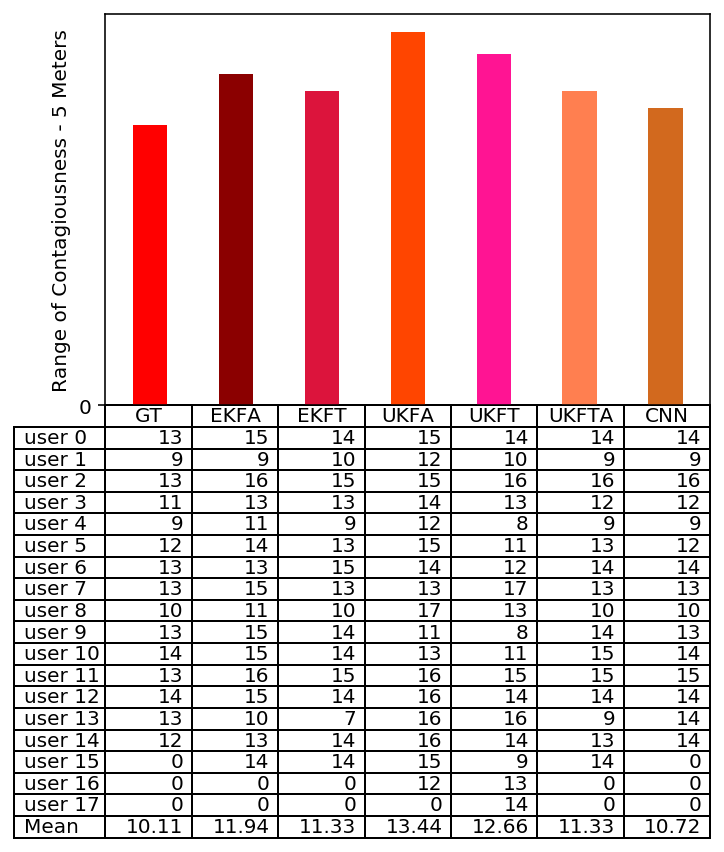

In [216]:
import numpy as np
import matplotlib.pyplot as plt

data = [[13, 15, 14, 15, 14, 14, 14],
         [9, 9, 10, 12, 10, 9, 9],
         [13, 16, 15, 15, 16, 16, 16],
         [11, 13, 13, 14, 13, 12, 12],
         [9, 11, 9, 12, 8, 9, 9],
         [12, 14, 13, 15, 11, 13, 12],
         [13, 13, 15, 14, 12, 14, 14],
         [13, 15, 13, 13, 17, 13, 13],
         [10, 11, 10, 17, 13, 10, 10],
         [13, 15, 14, 11, 8, 14, 13],
         [14, 15, 14, 13, 11, 15, 14],
         [13, 16, 15, 16, 15, 15, 15],
         [14, 15, 14, 16, 14, 14, 14],
         [13, 10, 7, 16, 16, 9, 14],
         [12, 13, 14, 16, 14, 13, 14],
         [0, 14, 14, 15, 9, 14, 0],
         [0, 0, 0, 12, 13, 0, 0],
         [0, 0, 0, 0, 14, 0, 0],
       [10.11, 11.94, 11.33, 13.44, 12.66, 11.33, 10.72]]



columns = ('GT', 'EKFA', 'EKFT', 'UKFA', 'UKFT', 'UKFTA', 'CNN')
rows = ['user %d' % x for x in range(18)]
rows.append('Mean')

values = np.arange(0, 20, 20)
value_increment = 2

# Get some pastel shades for the colors
# colors = plt.cm.Set1(np.linspace(0, 0.5, len(rows)))
colors = ['red', 'darkred', 'crimson', 'orangered', 'deeppink', 'coral', 'chocolate']
# PuRd, RdPu, Reds, YlOrRd, OrRd
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []

# for i in range(7):
#     plt.bar(index, data[10][i], bar_width, bottom=y_offset, color=colors)
    
plt.bar(index, data[18], bar_width, bottom=y_offset, color=colors)

for row in range(n_rows):
#     plt.bar(index, data[10][row], bar_width, bottom=y_offset, color=colors)
#     y_offset = y_offset + data[row]
    cell_text.append(data[row])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
# cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Range of Contagiousness - 5 Meters")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
# plt.title('Infected by Covid-19')

plt.show()

# 2 Meters 

In [194]:
data = [[ 10, 7, 7, 5, 5, 8, 4, 6, 9, 0, 0, 0],
        [ 10, 10, 9, 8, 7, 6, 11, 7, 10, 10, 0, 0],
        [ 10, 10, 10, 9, 8, 9, 10, 8, 10, 10, 0, 0],
        [ 12, 7, 8, 12, 10, 11, 10, 8, 9, 0, 0, 0],
        [7, 10, 10, 9, 10, 7, 7, 8, 9, 8, 11, 9],
        [11, 11, 9, 8, 6, 8, 9, 7, 7, 10, 0, 0],
        [10, 9, 8, 8, 6, 7, 8, 7, 9, 10, 0, 0]]

medians = []
for row in data:
    medians.append(np.mean(row))

f_data = []
for i in range(12):
    data_ = []
    for row in data:
        data_.append(row[i])
    
    f_data.append(data_)

f_data

[[10, 10, 10, 12, 7, 11, 10],
 [7, 10, 10, 7, 10, 11, 9],
 [7, 9, 10, 8, 10, 9, 8],
 [5, 8, 9, 12, 9, 8, 8],
 [5, 7, 8, 10, 10, 6, 6],
 [8, 6, 9, 11, 7, 8, 7],
 [4, 11, 10, 10, 7, 9, 8],
 [6, 7, 8, 8, 8, 7, 7],
 [9, 10, 10, 9, 9, 7, 9],
 [0, 10, 10, 0, 8, 10, 10],
 [0, 0, 0, 0, 11, 0, 0],
 [0, 0, 0, 0, 9, 0, 0]]

In [195]:
medians

[5.083333333333333,
 7.333333333333333,
 7.833333333333333,
 7.25,
 8.75,
 7.166666666666667,
 6.833333333333333]

In [170]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

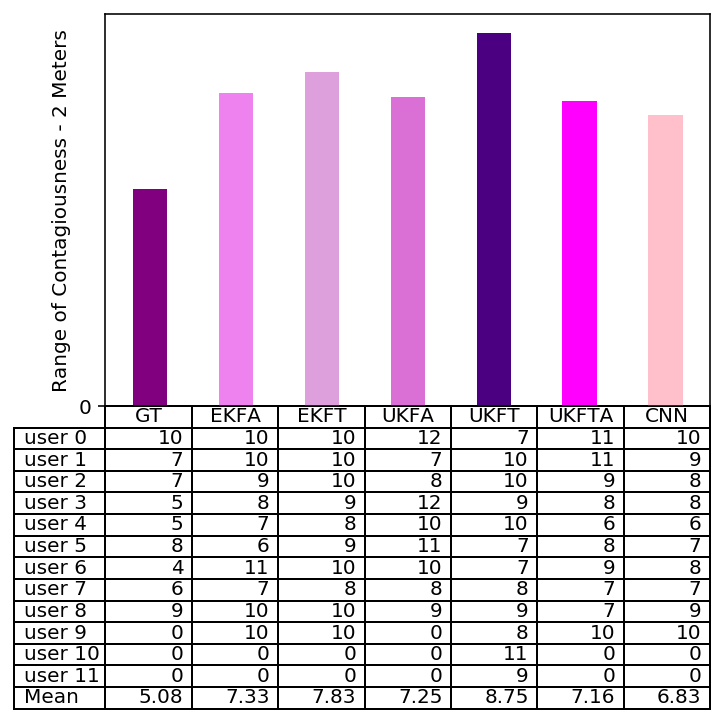

In [217]:
import numpy as np
import matplotlib.pyplot as plt

data = [[10, 10, 10, 12, 7, 11, 10],
         [7, 10, 10, 7, 10, 11, 9],
         [7, 9, 10, 8, 10, 9, 8],
         [5, 8, 9, 12, 9, 8, 8],
         [5, 7, 8, 10, 10, 6, 6],
         [8, 6, 9, 11, 7, 8, 7],
         [4, 11, 10, 10, 7, 9, 8],
         [6, 7, 8, 8, 8, 7, 7],
         [9, 10, 10, 9, 9, 7, 9],
         [0, 10, 10, 0, 8, 10, 10],
         [0, 0, 0, 0, 11, 0, 0],
         [0, 0, 0, 0, 9, 0, 0],
       [5.08, 7.33, 7.83, 7.25, 8.75, 7.16, 6.83]]



columns = ('GT', 'EKFA', 'EKFT', 'UKFA', 'UKFT', 'UKFTA', 'CNN')
rows = ['user %d' % x for x in range(12)]
rows.append('Mean')

values = np.arange(0, 20, 20)
value_increment = 2

# Get some pastel shades for the colors
# colors = plt.cm.Set1(np.linspace(0, 0.5, len(rows)))
colors = ['purple', 'violet', 'plum', 'orchid', 'indigo', 'fuchsia', 'pink']
# PuRd, RdPu, Reds, YlOrRd, OrRd
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []

# for i in range(7):
#     plt.bar(index, data[10][i], bar_width, bottom=y_offset, color=colors)
    
plt.bar(index, data[12], bar_width, bottom=y_offset, color=colors)

for row in range(n_rows):
#     plt.bar(index, data[10][row], bar_width, bottom=y_offset, color=colors)
#     y_offset = y_offset + data[row]
    cell_text.append(data[row])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
# cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Range of Contagiousness - 2 Meters")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
# plt.title('Infected by Covid-19')

plt.show()

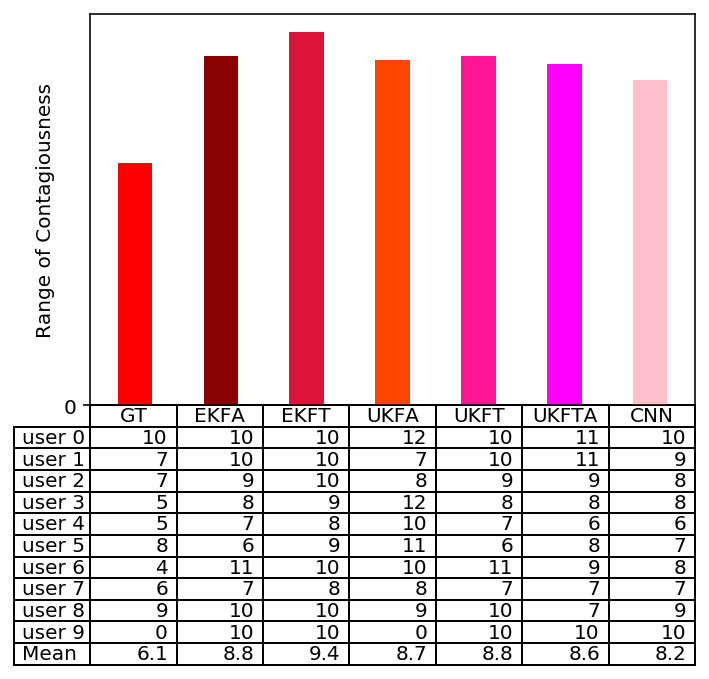

In [189]:
import numpy as np
import matplotlib.pyplot as plt

data = [[10, 10, 10, 12, 10, 11, 10],
         [7, 10, 10, 7, 10, 11, 9],
         [7, 9, 10, 8, 9, 9, 8],
         [5, 8, 9, 12, 8, 8, 8],
         [5, 7, 8, 10, 7, 6, 6],
         [8, 6, 9, 11, 6, 8, 7],
         [4, 11, 10, 10, 11, 9, 8],
         [6, 7, 8, 8, 7, 7, 7],
         [9, 10, 10, 9, 10, 7, 9],
         [0, 10, 10, 0, 10, 10, 10],
       [6.1, 8.8, 9.4, 8.7, 8.8, 8.6, 8.2]]


columns = ('GT', 'EKFA', 'EKFT', 'UKFA', 'UKFT', 'UKFTA', 'CNN')
rows = ['user %d' % x for x in range(10)]
rows.append('Mean')

values = np.arange(0, 20, 20)
value_increment = 2

# Get some pastel shades for the colors
# colors = plt.cm.Set1(np.linspace(0, 0.5, len(rows)))
colors = ['red', 'darkred', 'crimson', 'orangered', 'deeppink', 'fuchsia', 'pink']
# PuRd, RdPu, Reds, YlOrRd, OrRd
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []

# for i in range(7):
#     plt.bar(index, data[10][i], bar_width, bottom=y_offset, color=colors)
    
plt.bar(index, data[10], bar_width, bottom=y_offset, color=colors)

for row in range(n_rows):
#     plt.bar(index, data[10][row], bar_width, bottom=y_offset, color=colors)
#     y_offset = y_offset + data[row]
    cell_text.append(data[row])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
# cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Range of Contagiousness")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
# plt.title('Infected by Covid-19')

plt.show()

In [160]:
data = [[10, 10, 10, 12, 10, 11, 10],
         [7, 10, 10, 7, 10, 11, 9],
         [7, 9, 10, 8, 9, 9, 9],
         [5, 8, 9, 6, 8, 8, 8],
         [5, 7, 8, 6, 7, 6, 6],
         [8, 6, 9, 11, 6, 8, 8],
         [4, 11, 10, 8, 11, 9, 8],
         [6, 7, 8, 8, 7, 7, 7],
         [9, 10, 10, 9, 10, 7, 9],
         [0, 10, 10, 0, 10, 10, 10],
       [6.1, 8.8, 9.4, 8.9, 8.8, 8.6, 8.4]]

data[10][0]

6.1

In [131]:
plt.cm.Set1(np.linspace(0, 0.5, len(rows)))

array([[0.89411765, 0.10196078, 0.10980392, 1.        ],
       [0.89411765, 0.10196078, 0.10980392, 1.        ],
       [0.21568627, 0.49411765, 0.72156863, 1.        ],
       [0.21568627, 0.49411765, 0.72156863, 1.        ],
       [0.30196078, 0.68627451, 0.29019608, 1.        ],
       [0.30196078, 0.68627451, 0.29019608, 1.        ],
       [0.59607843, 0.30588235, 0.63921569, 1.        ],
       [0.59607843, 0.30588235, 0.63921569, 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ]])

In [58]:
import plotly.graph_objects as go

x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(x=x, y=[2,5,1,9], name='Montreal'))
fig.add_trace(go.Bar(x=x, y=[1, 4, 9, 16], name='Ottawa'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='Toronto'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':['d','a','c','b']})
fig.show()

In [57]:
import plotly.graph_objects as go

x=['GT', 'EKFA', 'EKFT', 'UKFA', 'UKFT', 'UKFTA', 'CNN']
fig = go.Figure(go.Bar(x=x, y=[2,5,1,9,5,1,9], name='GT'))
fig.add_trace(go.Bar(x=x, y=[1, 4, 9, 16], name='Ottawa'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='EKFA'))
fig.add_trace(go.Bar(x=x, y=[1, 4, 9, 16], name='EKFT'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='UKFA'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='UKFT'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='UKFTA'))
fig.add_trace(go.Bar(x=x, y=[6, 8, 4.5, 8], name='CNN'))


fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [40]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'


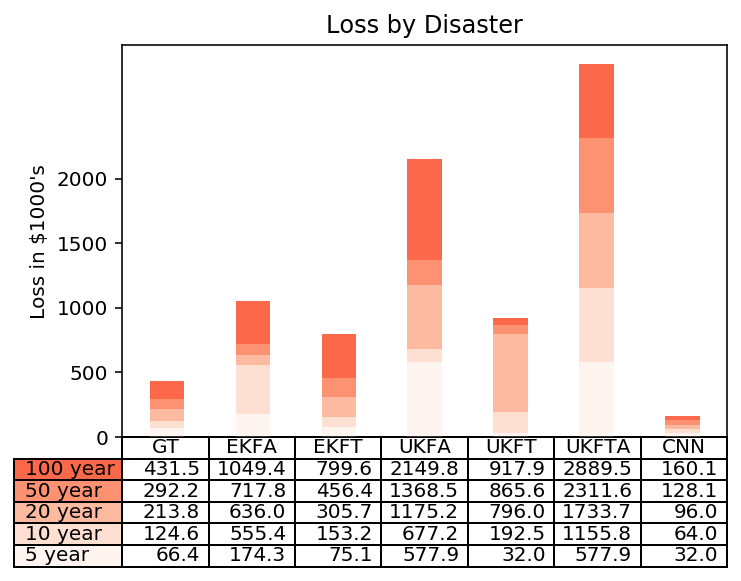

In [89]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454, 577908,  32015],
        [ 89135,  80552, 152558, 497981, 603535, 577908,  32015],
        [ 78415,  81858, 150656, 193263,  69638, 577908,  32015],
        [139361, 331509, 343164, 781380,  52269, 577908,  32015]]

columns = ('GT', 'EKFA', 'EKFT', 'UKFA', 'UKFT', 'UKFTA', 'CNN')
rows = ['user %d' % x for x in (9753518, 14841859, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.Reds(np.linspace(0, 0.5, len(rows)))
# PuRd, RdPu, Reds, YlOrRd, OrRd
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [44]:
plt.cm.RdPu(np.linspace(0, 0.5, len(rows)))

array([[0.96862745, 0.98823529, 0.99215686, 1.        ],
       [0.87792388, 0.92510573, 0.95664744, 1.        ],
       [0.74800461, 0.82674356, 0.9015917 , 1.        ],
       [0.61877739, 0.73550173, 0.85397924, 1.        ],
       [0.54901961, 0.58559016, 0.77517878, 1.        ]])

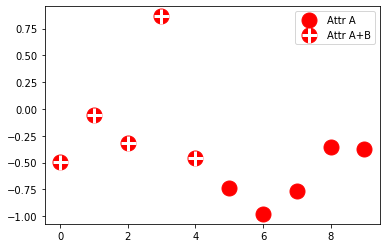

In [6]:
import matplotlib.pyplot as plt
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])